# Overview of the dataset
Reading and visualizing a single sample:

In [1]:
#imports and global variables
import numpy as np
import os
import csv
import pandas as pd
import random
from scipy import stats
from scipy.signal import find_peaks
import json
import matplotlib.pyplot as plt

import TENmWalklib as TW

samples = 208

data_path = './Dataset'

Sample User Characteristics:
User Id: 56
User Age: 90
User Region: Fundão


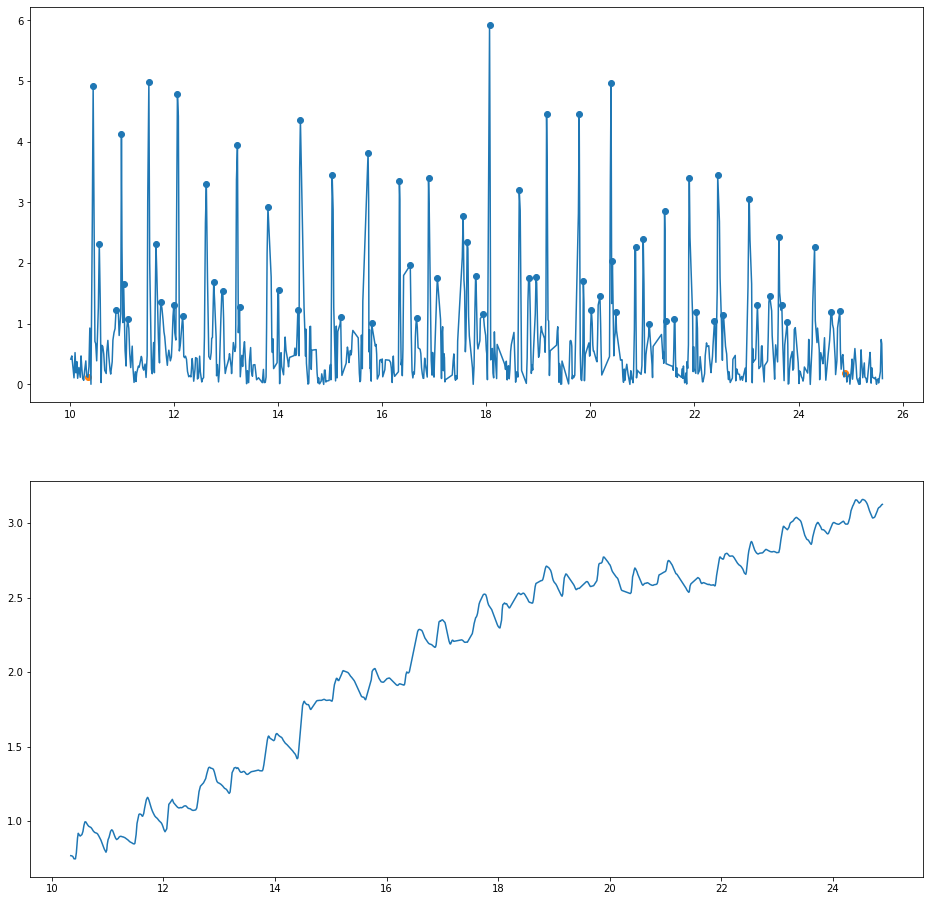

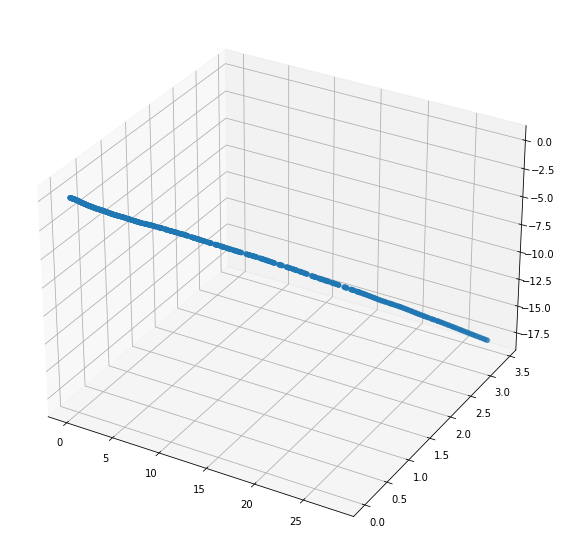

In [2]:
#read all files for random sample and print info
a = random.randint(1,samples)
sample_path = os.path.join(data_path,str(a))
json_path = os.path.join(sample_path,'user_data.json')
#read data and visualize
with open(json_path, 'r', encoding= 'utf-8') as f:
    sample_data =  json.load(f)
    user_id = sample_data['id']
    user_age = sample_data['age']
    user_weight = sample_data['weight_kg']
    user_height = sample_data['height_cm']
    user_region = sample_data['region']
    user_specdiet = sample_data['specific_diet']
    user_fruitsveg = sample_data['fruit_vegetables_number_day']
    user_junkfood = sample_data['sweets_times_week']
    user_wcoms = sample_data['water_liters_day']
    user_hprobl = sample_data['diseases']
    user_shours = sample_data['sleeping_time_hours']
    user_abc = sample_data['alcoholic_beverages']
    sensors = sample_data['sensors']['name']
    print("Sample User Characteristics:")
    print("User Id:",user_id)
    print("User Age:",user_age)
    print("User Region:",user_region)

    data_values={}
    accel_file = sample_path + '/' + 'accelerometer.txt'
    with open(accel_file, 'r') as f:
        accel_data = f.readlines()
        data_values['accelerometer'] = []
        for time_instant in accel_data[1:]:
            time_instant = time_instant.split()
            data_values['accelerometer'] = data_values['accelerometer'] + \
                    [[eval(time_instant[0]), [eval(component) for component in time_instant[1:]]]]
        ### Acelerómetro
        AccelResults = TW.accelerometer(data_values)

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter([AccelResults[i][0] - AccelResults[0][0] for i in range(len(AccelResults))], \
               [AccelResults[i][1] - AccelResults[0][1] for i in range(len(AccelResults))], \
               [AccelResults[i][2] - AccelResults[0][2] for i in range(len(AccelResults))])
    #if(len(df.columns)>1):
    #    df = df.iloc[:,5:6]
    #graf = df.plot(title='10 m Walk', figsize=(30,5))
    #graf.legend(['ECG'])
    #df.hist()

In [3]:
from sklearn.preprocessing import StandardScaler
# import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn

# Classification Gender

In [4]:
genderfile_csv = os.path.join('./', 'results.csv')
df_gender = pd.read_csv(genderfile_csv, encoding='utf-8')
#df_gender.columns = df_gender.columns.str.replace("Average of ", "")
df_gender.drop('Sample', inplace=True, axis=1)
df_gender.drop('Id', inplace=True, axis=1)
df_gender.drop('DisCode', inplace=True, axis=1)
df_gender.drop('DisName', inplace=True, axis=1)

In [5]:
df_gender

,Gender,Age,Mass,Walking Aids,Total Time,Steps,Mean Stepping Time,Mean Speed,Mean Force,Distance,Mean Power,Mean Inclination,MainDirXX,MainDirYY,MainDirZZ,Sleeping Time/h
0,Male,78,68,False,7.8925,8,1.0096,74.3036,1.0927,8.7705,-544.7883,0.4755,0.0246,0.0262,-0.0968,8
1,Male,78,68,False,7.8925,8,1.0096,74.3036,1.0927,8.7705,-544.7883,0.4755,0.0246,0.0262,-0.0968,8
2,Male,78,68,False,7.8925,8,1.0096,74.3036,1.0927,8.7705,-544.7883,0.4755,0.0246,0.0262,-0.0968,8
3,Male,78,68,False,7.8925,8,1.0096,74.3036,1.0927,8.7705,-544.7883,0.4755,0.0246,0.0262,-0.0968,8
4,Male,78,68,False,7.0725,8,0.8985,40.0384,0.5888,4.0464,-441.7479,0.0728,0.0477,0.1820,0.1578,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,Female,87,58,True,12.3455,12,1.0498,19.9114,0.3433,4.2414,-106.7601,0.7025,0.0211,-0.0261,0.0676,8
815,Female,87,58,True,12.3455,12,1.0498,19.9114,0.3433,4.2414,-106.7601,0.7025,0.0211,-0.0261,0.0676,8
816,Female,87,58,True,12.3455,12,1.0498,19.9114,0.3433,4.2414,-106.7601,0.7025,0.0211,-0.0261,0.0676,8
817,Female,87,58,True,12.3455,12,1.0498,19.9114,0.3433,4.2414,-106.7601,0.7025,0.0211,-0.0261,0.0676,8


Classification on gender features:

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn

train, test = train_test_split(df_gender, test_size=0.3)

X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

#Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Classifier comparison


........ Score and Classification Report for Nearest Neighbors .............

              precision    recall  f1-score   support

      Female       0.97      0.97      0.97       185
        Male       0.90      0.92      0.91        61

    accuracy                           0.96       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.96      0.96      0.96       246



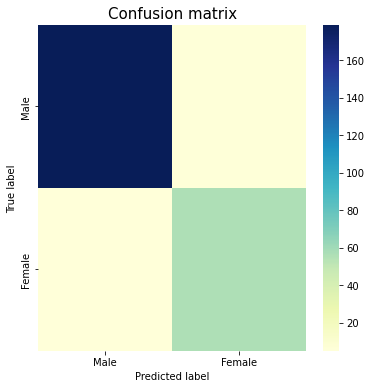


........ Score and Classification Report for RBF SVM .............

              precision    recall  f1-score   support

      Female       0.75      1.00      0.86       185
        Male       0.00      0.00      0.00        61

    accuracy                           0.75       246
   macro avg       0.38      0.50      0.43       246
weighted avg       0.57      0.75      0.65       246



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


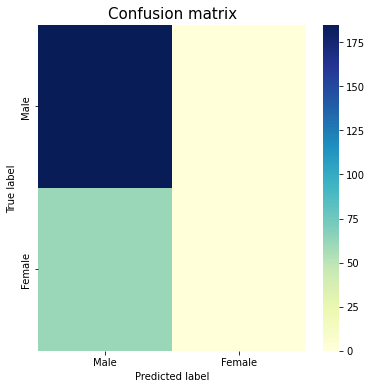


........ Score and Classification Report for Decision Tree .............

              precision    recall  f1-score   support

      Female       0.99      1.00      1.00       185
        Male       1.00      0.98      0.99        61

    accuracy                           1.00       246
   macro avg       1.00      0.99      0.99       246
weighted avg       1.00      1.00      1.00       246



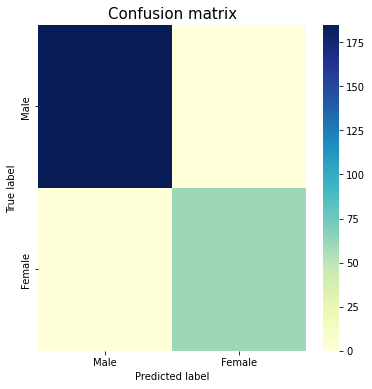


........ Score and Classification Report for Random Forest .............

              precision    recall  f1-score   support

      Female       0.85      1.00      0.92       185
        Male       1.00      0.48      0.64        61

    accuracy                           0.87       246
   macro avg       0.93      0.74      0.78       246
weighted avg       0.89      0.87      0.85       246



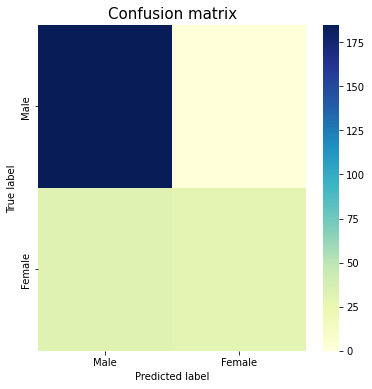


........ Score and Classification Report for Neural Net .............

              precision    recall  f1-score   support

      Female       0.86      1.00      0.93       185
        Male       1.00      0.52      0.69        61

    accuracy                           0.88       246
   macro avg       0.93      0.76      0.81       246
weighted avg       0.90      0.88      0.87       246



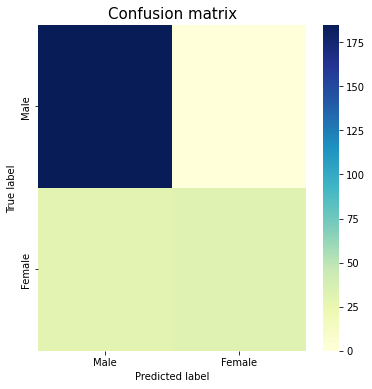


........ Score and Classification Report for AdaBoost .............

              precision    recall  f1-score   support

      Female       0.99      0.99      0.99       185
        Male       0.97      0.97      0.97        61

    accuracy                           0.98       246
   macro avg       0.98      0.98      0.98       246
weighted avg       0.98      0.98      0.98       246



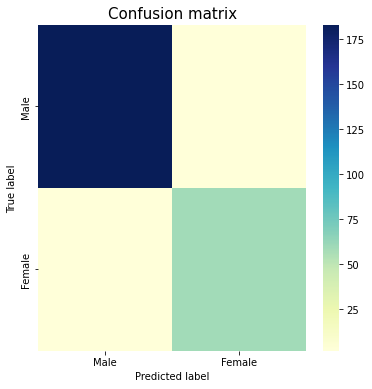


........ Score and Classification Report for Naive Bayes .............

              precision    recall  f1-score   support

      Female       0.99      0.99      0.99       185
        Male       0.98      0.97      0.98        61

    accuracy                           0.99       246
   macro avg       0.99      0.98      0.98       246
weighted avg       0.99      0.99      0.99       246



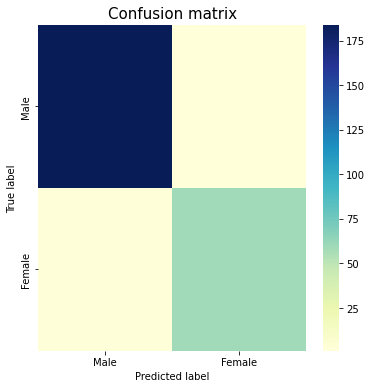

|       Classifier        |          Score          |
------------------------------------------------------
|    Nearest Neighbors    |   0.9552845528455285    |
|         RBF SVM         |   0.7520325203252033    |
|      Decision Tree      |   0.9959349593495935    |
|      Random Forest      |   0.8699186991869918    |
|       Neural Net        |   0.8821138211382114    |
|        AdaBoost         |    0.983739837398374    |
|       Naive Bayes       |   0.9878048780487805    |


In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = [
    "Nearest Neighbors",
    #"Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
]
alllabels = ['Male', 'Female']
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    print('\n........ Score and Classification Report for {0} .............\n'.format(name))
    scores.append(score)
    print(classification_report(y_test, y_pred))

    cfm1 = confusion_matrix(y_test, y_pred)
    fig= plt.subplots(figsize=(6,6))
    seaborn.heatmap(cfm1, xticklabels=alllabels, yticklabels=alllabels,cmap = 'YlGnBu')
    plt.title('Confusion matrix', fontsize = 15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
print("|{0:^25}|{1:^25}|".format("Classifier","Score"))
print("------------------------------------------------------")
for name,score in zip(names,scores):
    print("|{0:^25}|{1:^25}|".format(name,score))

# Classification Diseases

In [8]:
DiseaseClass_csv = os.path.join('./', 'DiseasesDicClass.csv')
df_disC = pd.read_csv(DiseaseClass_csv, sep=";", encoding='utf-8', names=['Disease', 'Code', 'DisClass'])
diseasefile_csv = os.path.join('./', 'results.csv')
df_dis = pd.read_csv(diseasefile_csv, encoding='utf-8')
#df_dis.columns = df_dis.columns.str.replace("Average of ", "")
df_dis.drop('Sample', inplace=True, axis=1)
df_dis.drop('Id', inplace=True, axis=1)
# get a list of the columns
col_list = list(df_dis)
# use this handy way to swap the elements
col_list[0], col_list[-1] = col_list[-1], col_list[0]
# assign back, the order will now be swapped
df_dis = df_dis[col_list]
df_dis.drop('Gender', inplace=True, axis=1)
df_dis["DiseaseClassif"] = " "
for indice in range(len(df_dis)):
    df_dis["DiseaseClassif"].values[indice] = df_disC.loc[df_disC['Code']==df_dis['DisCode'][indice], 'DisClass'].values[0]
print(df_dis)
print(df_disC)

# get a list of the columns
col_list = list(df_dis)
# use this handy way to swap the elements
col_list[0], col_list[-1] = col_list[-1], col_list[0]
# assign back, the order will now be swapped
df_dis = df_dis[col_list]
df_dis.drop('DisName', inplace=True, axis=1)
df_dis.drop('DisCode', inplace=True, axis=1)
duplicate = df_dis[df_dis.duplicated()]
df_dis = df_dis.drop(list(duplicate.index)).reset_index()
df_dis.drop('index', inplace=True, axis=1)
df_dis

                              DisName  Age  Mass  Walking Aids  Total Time  \
0                 Depressive Syndrome   78    68         False      7.8925   
1        Left Ventricular Hypertrophy   78    68         False      7.8925   
2                            Diabetes   78    68         False      7.8925   
3               Arterial Hypertension   78    68         False      7.8925   
4                 Depressive Syndrome   78    68         False      7.0725   
..                                ...  ...   ...           ...         ...   
814             Arterial Hypertension   87    58          True     12.3455   
815                      Coxarthrosis   87    58          True     12.3455   
816               Parkinson'S Disease   87    58          True     12.3455   
817  Fracture Of The Ischiopubic Rami   87    58          True     12.3455   
818                      Dyslipidemia   87    58          True     12.3455   

     Steps  Mean Stepping Time  Mean Speed  Mean Force  Distanc

,DiseaseClassif,Age,Mass,Walking Aids,Total Time,Steps,Mean Stepping Time,Mean Speed,Mean Force,Distance,Mean Power,Mean Inclination,MainDirXX,MainDirYY,MainDirZZ,Sleeping Time/h
0,Psychiatry,78,68,False,7.8925,8,1.0096,74.3036,1.0927,8.7705,-544.7883,0.4755,0.0246,0.0262,-0.0968,8
1,Cardiology,78,68,False,7.8925,8,1.0096,74.3036,1.0927,8.7705,-544.7883,0.4755,0.0246,0.0262,-0.0968,8
2,Endocrinology,78,68,False,7.8925,8,1.0096,74.3036,1.0927,8.7705,-544.7883,0.4755,0.0246,0.0262,-0.0968,8
3,Psychiatry,78,68,False,7.0725,8,0.8985,40.0384,0.5888,4.0464,-441.7479,0.0728,0.0477,0.1820,0.1578,8
4,Cardiology,78,68,False,7.0725,8,0.8985,40.0384,0.5888,4.0464,-441.7479,0.0728,0.0477,0.1820,0.1578,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,Endocrinology,87,58,True,27.7055,25,1.1223,28.9420,0.4990,13.7430,-218.7813,0.3627,-0.0035,-0.0070,0.0309,8
624,Cardiology,87,58,True,12.3455,12,1.0498,19.9114,0.3433,4.2414,-106.7601,0.7025,0.0211,-0.0261,0.0676,8
625,Orthopedics,87,58,True,12.3455,12,1.0498,19.9114,0.3433,4.2414,-106.7601,0.7025,0.0211,-0.0261,0.0676,8
626,Neurology,87,58,True,12.3455,12,1.0498,19.9114,0.3433,4.2414,-106.7601,0.7025,0.0211,-0.0261,0.0676,8


Classification on disease features:

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn

train, test = train_test_split(df_dis, test_size=0.5)

X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

#Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Classifier comparison


........ Score and Classification Report for Nearest Neighbors .............

                  precision    recall  f1-score   support

      Cardiology       0.14      0.29      0.19        63
     Dermatology       0.00      0.00      0.00         3
   Endocrinology       0.13      0.11      0.12        56
Gastroenterology       0.00      0.00      0.00        12
 General Surgery       0.00      0.00      0.00         3
        Genetics       0.00      0.00      0.00         0
      Hematology       0.00      0.00      0.00         9
      Immunology       0.00      0.00      0.00         2
      Nephrology       0.00      0.00      0.00         3
       Neurology       0.00      0.00      0.00        29
    Neurosurgery       0.00      0.00      0.00         1
            None       0.25      0.22      0.24         9
       Nutrition       0.00      0.00      0.00         2
        Oncology       0.00      0.00      0.00         5
   Ophthalmology       0.00      0.00      0.00   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


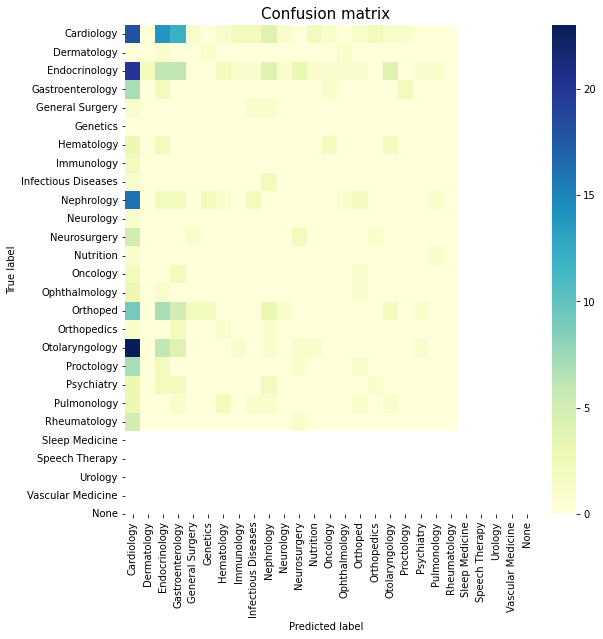


........ Score and Classification Report for Linear SVM .............

              precision    recall  f1-score   support

  Cardiology       0.20      1.00      0.34        63
        None       1.00      0.22      0.36         9

   micro avg       0.21      0.90      0.34        72
   macro avg       0.60      0.61      0.35        72
weighted avg       0.30      0.90      0.34        72



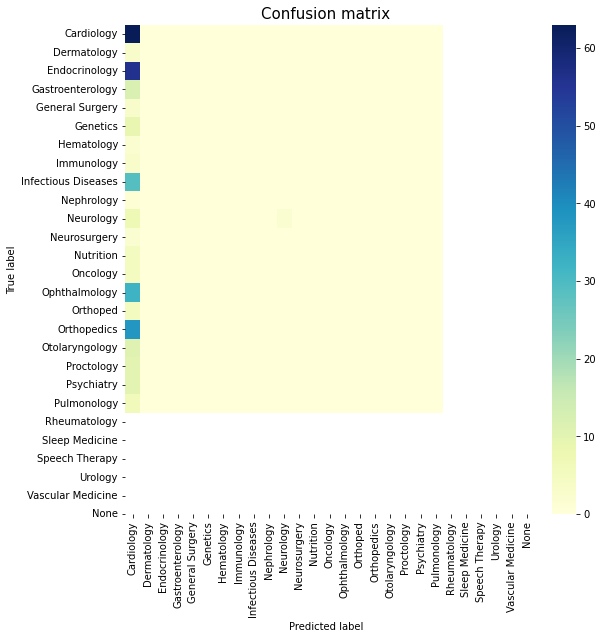


........ Score and Classification Report for RBF SVM .............

                   precision    recall  f1-score   support

       Cardiology       0.11      0.29      0.16        63
      Dermatology       0.00      0.00      0.00         3
    Endocrinology       0.00      0.00      0.00        56
 Gastroenterology       0.00      0.00      0.00        12
         Genetics       0.00      0.00      0.00         0
       Nephrology       0.00      0.00      0.00         3
        Neurology       0.00      0.00      0.00        29
         Oncology       0.00      0.00      0.00         5
      Orthopedics       0.00      0.00      0.00        32
   Otolaryngology       0.00      0.00      0.00         5
       Psychiatry       0.00      0.00      0.00        38
      Pulmonology       0.00      0.00      0.00        11
          Urology       0.00      0.00      0.00        10
Vascular Medicine       0.00      0.00      0.00         6

        micro avg       0.06      0.07      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


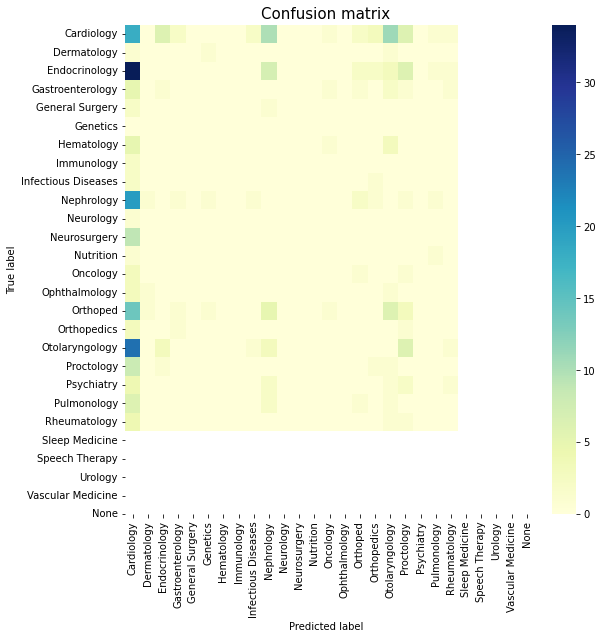


........ Score and Classification Report for Decision Tree .............

                  precision    recall  f1-score   support

      Cardiology       0.20      0.52      0.29        63
     Dermatology       0.07      0.33      0.11         3
   Endocrinology       0.19      0.20      0.19        56
Gastroenterology       0.00      0.00      0.00        12
       Neurology       0.00      0.00      0.00        29
            None       0.67      0.22      0.33         9
      Psychiatry       0.16      0.21      0.18        38

       micro avg       0.18      0.26      0.21       210
       macro avg       0.18      0.21      0.16       210
    weighted avg       0.17      0.26      0.19       210



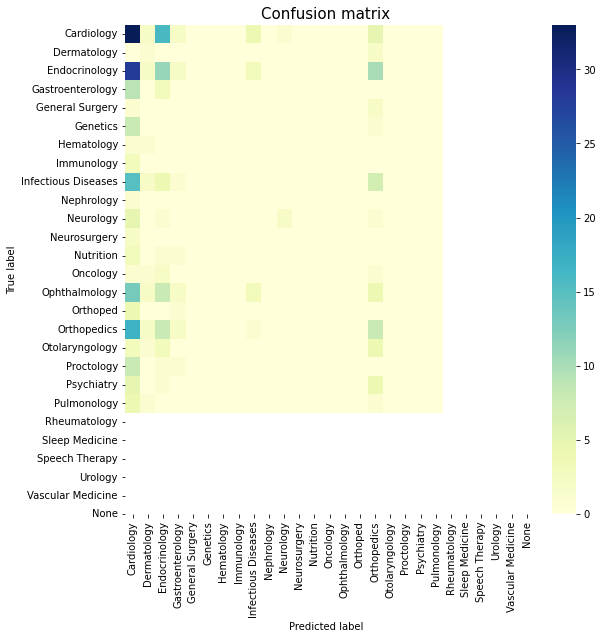


........ Score and Classification Report for Random Forest .............

                     precision    recall  f1-score   support

         Cardiology       0.19      0.60      0.29        63
        Dermatology       0.00      0.00      0.00         3
      Endocrinology       0.12      0.02      0.03        56
   Gastroenterology       0.00      0.00      0.00        12
           Genetics       0.00      0.00      0.00         0
         Immunology       0.00      0.00      0.00         2
Infectious Diseases       0.00      0.00      0.00         0
         Nephrology       0.00      0.00      0.00         3
          Neurology       0.00      0.00      0.00        29
           Oncology       0.00      0.00      0.00         5
        Orthopedics       0.00      0.00      0.00        32
     Otolaryngology       0.14      0.20      0.17         5
         Psychiatry       0.10      0.08      0.09        38
        Pulmonology       0.00      0.00      0.00        11
       Rh

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


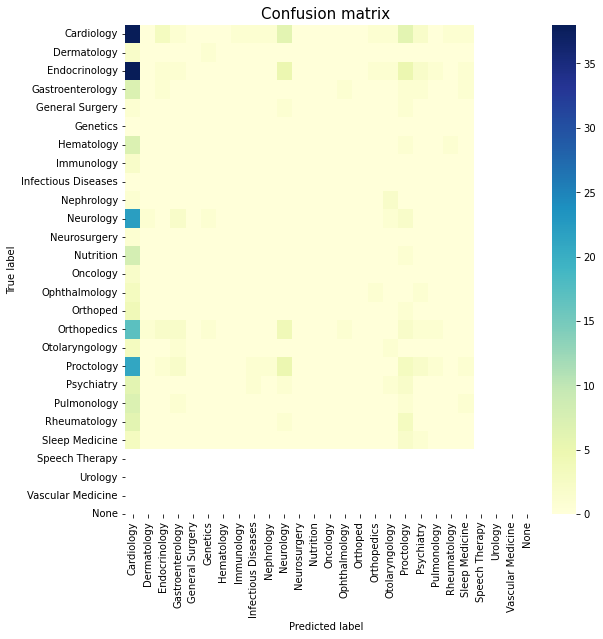

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being 


........ Score and Classification Report for Neural Net .............

                     precision    recall  f1-score   support

         Cardiology       0.11      0.21      0.15        63
        Dermatology       0.00      0.00      0.00         3
      Endocrinology       0.14      0.11      0.12        56
   Gastroenterology       0.00      0.00      0.00        12
           Genetics       0.00      0.00      0.00         0
         Hematology       0.00      0.00      0.00         9
Infectious Diseases       0.00      0.00      0.00         0
         Nephrology       0.00      0.00      0.00         3
          Neurology       0.04      0.03      0.04        29
               None       1.00      0.22      0.36         9
      Ophthalmology       0.00      0.00      0.00         5
        Orthopedics       0.00      0.00      0.00        32
     Otolaryngology       0.08      0.20      0.12         5
         Psychiatry       0.03      0.03      0.03        38
        Pulm

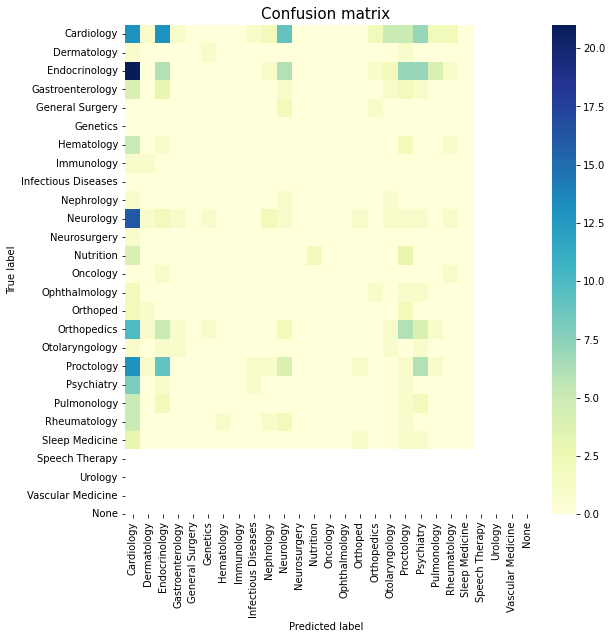


........ Score and Classification Report for AdaBoost .............

              precision    recall  f1-score   support

  Cardiology       0.22      0.98      0.36        63
 Dermatology       0.06      0.33      0.10         3
   Neurology       0.11      0.03      0.05        29
        None       1.00      0.22      0.36         9

   micro avg       0.21      0.63      0.32       104
   macro avg       0.35      0.39      0.22       104
weighted avg       0.25      0.63      0.26       104



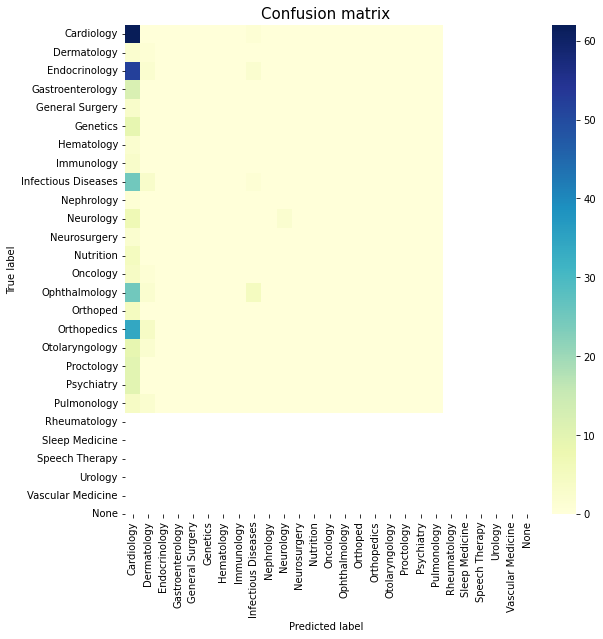


........ Score and Classification Report for Naive Bayes .............

                     precision    recall  f1-score   support

         Cardiology       0.19      0.14      0.16        63
        Dermatology       0.00      0.00      0.00         3
      Endocrinology       0.00      0.00      0.00        56
   Gastroenterology       0.12      0.08      0.10        12
    General Surgery       0.00      0.00      0.00         3
           Genetics       0.00      0.00      0.00         0
         Hematology       0.00      0.00      0.00         9
         Immunology       0.06      0.50      0.11         2
Infectious Diseases       0.00      0.00      0.00         0
         Nephrology       0.00      0.00      0.00         3
          Neurology       0.10      0.07      0.08        29
       Neurosurgery       0.00      0.00      0.00         1
               None       0.50      0.22      0.31         9
          Nutrition       0.11      0.50      0.18         2
           

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


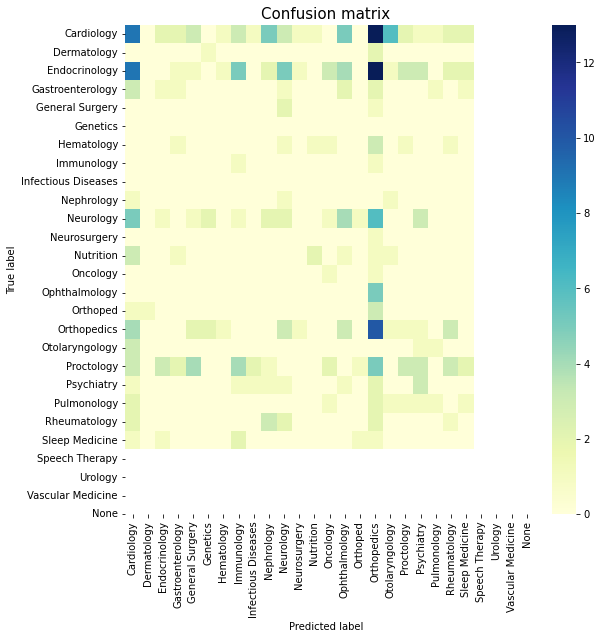

|       Classifier        |          Score          |
------------------------------------------------------
|    Nearest Neighbors    |   0.08280254777070063   |
|       Linear SVM        |   0.2070063694267516    |
|         RBF SVM         |   0.05732484076433121   |
|      Decision Tree      |   0.1751592356687898    |
|      Random Forest      |   0.13694267515923567   |
|       Neural Net        |   0.07643312101910828   |
|        AdaBoost         |   0.21019108280254778   |
|       Naive Bayes       |   0.10828025477707007   |


In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
]
#alllabels = ['Age-Related Macular Degeneration', 'Aggressiveness', 'Alcoholism', 'Allergic Rhinitis', 'Alzheimer\'s', 'Anemia', 'Anticoagulated', 'Anxiety', 'Arterial Fiber', 'Arterial Hypertension', 'Arterial Hypertensionanxiety', 'Asteoricospic Plaque In The Right Carotid Bulb', 'Asthma', 'Asthmatic Bronchitis', 'Atrial Fibrillation', 'Atrioventricular Block', 'Barrett\'s Esophagus', 'Basalioma', 'Benign Prostate Hyperplasia', 'Benign Prostatic Hyperplasia', 'Bifascicular Block', 'Bilateral Gonarthrosis', 'Bilateral Omarthrosis', 'Bipolar Affective Disorder', 'Bipolar Disorder', 'Blind On The Right', 'Bulbar Ulcers', 'Cardiac Arrhythmia', 'Cardiac Insufficiency', 'Cardiomyopathy', 'Cardiovascular', 'Cataract', 'Cataracts', 'Cervical Hernia', 'Cervical Spondylosis', 'Cholecystectomy', 'Cholesterol', 'Cholestrol', 'Chronic Anemia', 'Chronic Arterial Disease', 'Chronic Atrial Fibrillation', 'Chronic Kidney Disease', 'Chronic Obstructive Pulmonary Disease', 'Chronic Sinusitis', 'Chronic Venous Insufficiency', 'Cognitive Deficit', 'Colon Adenocarcinoma', 'Colonic Neoplasm', 'Confusion Syndrome', 'Constipation', 'Coronary Heart Disease', 'Coxarthrosis', 'Cystitis', 'Dacryocystorhinostomy', 'Deep Vein Thrombosis', 'Deficit Of Verbal Expression', 'Dementia', 'Depression', 'Depressive Syndrome', 'Depressive-Anxious Syndrome', 'Dermatitis', 'Diabetes', 'Diarrhea', 'Dilation Of The Left Auricle', 'Discopathy', 'Distal Radio', 'Diverticular Disease', 'Dizziness Syndrome', 'Dorsal Spondylosis', 'Down\'s Syndrome', 'Duodenal Ulcer', 'Dyslipidemia', 'Endogenous Depression', 'Ephatic Gnosis', 'Epilepsia', 'Epilepsy', 'Esophagitis', 'Ethanolic Habits', 'Ex-Smoker', 'Fracture', 'Fracture Of The Ischiopubic Rami', 'Gastric Ulcers', 'Gastritis', 'Glaucoma', 'Gonarthrosis', 'Hallucinations', 'Hearing', 'Hearing Problems', 'Heart Disease', 'Heart Failure', 'Hemorrhoids', 'Hernia', 'Herpes', 'Hiatus Hernia', 'High Blood Pressure', 'High Blood Pressure ', 'Hip Amputation', 'Hip Prosthesis', 'Hyperactivity', 'Hypercholesterolemia', 'Hyperplasia', 'Hypertensive Congestive Heart Failure', 'Hyperthyroidism', 'Hypertrophy Of The Interventricular Septum', 'Hypothyroidism', 'Insanity', 'Insomnia', 'Insuficiência Cardíaca', 'Insuficiência Renal', 'Intellectual Deficit', 'Intestinal Bands', 'Ischemic Heart Disease', 'Ischemic Leukoencephalopathy', 'Ischemic Stroke', 'Kidney Disease', 'Knee Prosthesis', 'Lateral Malleolus Fracture', 'Left Atrial Dilation', 'Left Rhizarthrosis', 'Left Ventricular Hypertrophy', 'Lumbar Hernia', 'Lumbar Spondylodiscoarthritis', 'Lymphoma', 'Ménière\'s Disease', 'Ménière\'s Syndrome', 'Melanoma', 'Mental Disability', 'Moderate Mitral Insufficiency', 'Modular Goiter', 'Morbid Obesity', 'None', 'Neurotic Depression', 'Obesity', 'Obstructive Sleep Apnea Syndrome', 'Obstructive Venous Alteration', 'Occlusive Peripheral Arterial Disease', 'Occlusive Peripheral Artery Disease', 'Osteoarthritis', 'Osteopathic Dorsal Trauma', 'Osteopenia', 'Osteoporosis', 'Osteoporosis ', 'Pacemaker', 'Parietal Meningioma', 'Parkinson\'s', 'Parkinson\'s Spine Problems', 'Perceptual Hypoacusis', 'Polypectomy', 'Post-Cholecystectomy Syndrome', 'Primary Hyperuricemia', 'Prostate', 'Psoriasis', 'Psychosis', 'Pulmonary Arterial Hypertension', 'Pulmonary Edema', 'Renal Lytrase', 'Respiratory Failure', 'Rheumatoid Arthritis', 'Rhinoconjunctivitis', 'Right Gonarthrosis', 'Right Hemicolectomy', 'Right Nephrectomy', 'Schizophrenia', 'Sequelae Of Peritoneal Tuberculosis', 'Sigmoidectomy', 'Silicosis', 'Sinus Bradycardia', 'Sinusoidal Hypertrophy Of The Prostate', 'Smoking', 'Spine Problems', 'Stroke', 'Stuttering', 'Supraumbilical Hernia', 'Temporary Colostomy And Laparotomy', 'Tension Headaches', 'Thyroid Follicular Tumor', 'Thyroid Nodules', 'Transient Ischemic Attacks', 'Tremor', 'Tuberculosis', 'Ulcer', 'Urosepsis', 'Varicose Veins', 'Vascular Dementia', 'Venous Thrombosis', 'Ventricular Fibrillation', 'Verteginous Syndrome', 'Vertigo Syndrome', 'Vitamin A Deficiency', 'Vitamin D Deficiency', 'Wrist Osteoarthritis']
alllabels = ['Cardiology', 'Dermatology', 'Endocrinology', 'Gastroenterology', 'General Surgery', 'Genetics', 'Hematology', 'Immunology', 'Infectious Diseases', 'Nephrology', 'Neurology', 'Neurosurgery', 'Nutrition', 'Oncology', 'Ophthalmology', 'Orthoped', 'Orthopedics', 'Otolaryngology', 'Proctology', 'Psychiatry', 'Pulmonology', 'Rheumatology', 'Sleep Medicine', 'Speech Therapy', 'Urology', 'Vascular Medicine', 'None']


scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    print('\n........ Score and Classification Report for {0} .............\n'.format(name))
    scores.append(score)
    print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

    cfm1 = confusion_matrix(y_test, y_pred)
    fig= plt.subplots(figsize=(9,9))
    seaborn.heatmap(cfm1, xticklabels=alllabels, yticklabels=alllabels,cmap = 'YlGnBu')
    plt.title('Confusion matrix', fontsize = 15)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
print("|{0:^25}|{1:^25}|".format("Classifier","Score"))
print("------------------------------------------------------")
for name,score in zip(names,scores):
    print("|{0:^25}|{1:^25}|".format(name,score))